# Modelling approach

The modelling approach here is to iterate over a list of classifiers and run a grid search with 10 fold cross validation.

The 10 fold cross validation approach is used because we need to work around the fact that there are only `3000` labelled observations and we can now use all of them to train and evaluate model performance.

In [73]:
# Reload local modules as they are changing a lot
%load_ext autoreload
%autoreload 2
import warnings

# Deprecations and pandas slice warnings due to the train_test split
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Load in data from the `DATA_DIR` and start with features (X) and target (y)

In [75]:
from trainer_lib import DataManager
from trainer_lib.utils.notebook_config import DATA_DIR, REPORT_DIR
# The instantiation will fetch the data and documentation
mngr = DataManager(save_path=DATA_DIR, report_path=REPORT_DIR)
X,y = mngr.train
X_test, _ = mngr.train


The code below will train the following classifiers on the training data:

- Linear SVM
- Decision Tree 
- Random Forest 
- Neural Net
- AdaBoost
- Naive Bayes
- XGB

In [116]:
from trainer_lib.modelling.train import Trainer, Evaluation, Explain
from trainer_lib.utils.notebook_config import MODEL_DIR
from trainer_lib.modelling.model_config import GRID_SEARCH, MODEL_POST_URL
trainer = Trainer(X,y, GRID_SEARCH, MODEL_DIR)
trainer.train("Test")


──────────────────────────── Experiment name: Test ─────────────────────────────



Output()

Note: the score improved from 0.92 to 0.93 on the XGBoost model by filling the `DaysPassed` feature's negative values with the median.

*The following code will only work for XGBOOST as the classifier**

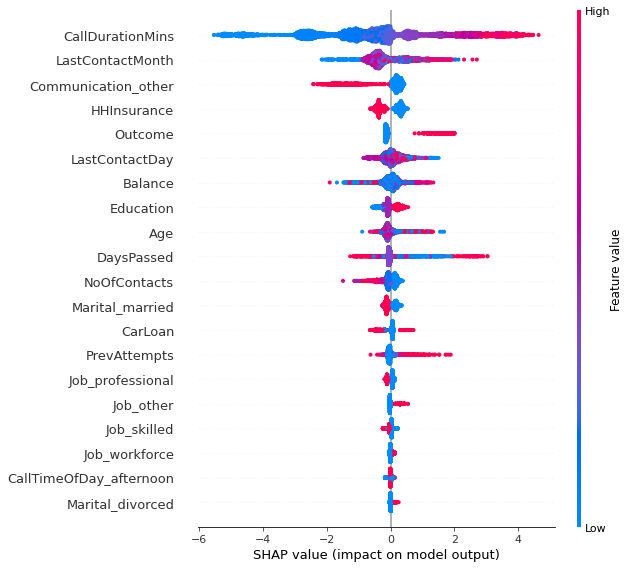

In [117]:
import matplotlib.pyplot as plt
import shap
explain = Explain(trainer.best_classifier, X)
explain.summary()

# Prediction

As the trained models are pickled and saved, the FastAPI REST interface (available at http://localhost.3007/docs) will be used for predictions.


This has the advantage of recording in an SQLlite DB the predictons

In [140]:
from trainer_lib.modelling.predict import Predict

In [141]:
model_id = "c70bf73a9c0d967982b32b9af07d66b9261adbb3"
predict = Predict(X.iloc[0:1], model_id)

In [142]:
r = predict()

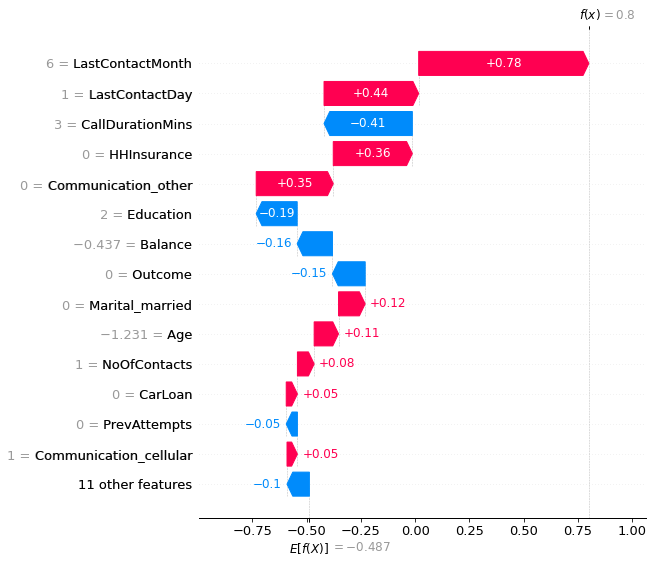

In [118]:
explain.waterfall(10)

In [83]:
# Initialize your Jupyter notebook with initjs(), otherwise you will get an error message.
shap.initjs()
explain.prediction(10)

In [143]:
import pandas as pd
pd.DataFrame(r.json())

JSONDecodeError: Expecting value: line 1 column 1 (char 0)